Total amount of images: 354
(566, 2, 224, 224, 3)


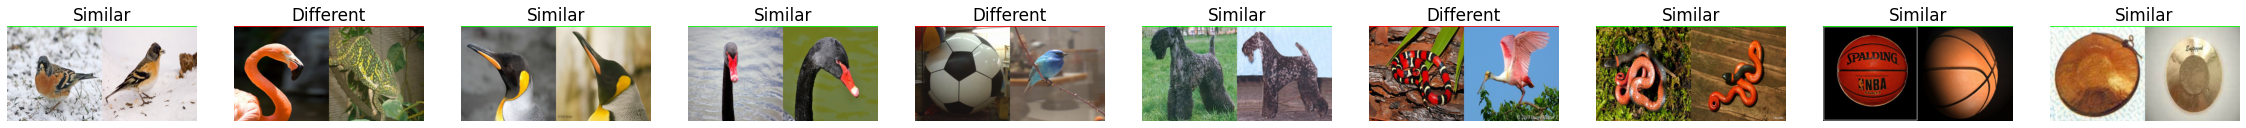

In [1]:
import util
import numpy as np

folders = util.load_images('data/dataset_pairs')
data, labels = util.create_pairs(folders)
data, labels = util.shuffle_data(data, labels)
data_split, labels_split = util.split_data(data, labels)
data_train, data_val, data_test = data_split
labels_train, labels_val, labels_test = labels_split

print(data_train.shape)

util.visualize(data_train, labels_train)

In [2]:
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2

input_shape = (224, 224, 3)

# ResNet50 Feature Extraction

mobilenet_embedding = Sequential(name='mobilenet_embedding')
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
mobilenet.Trainable = False
mobilenet_embedding.add(mobilenet)
mobilenet_embedding.add(GlobalAveragePooling2D())

In [3]:
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.resnet import ResNet50

input_shape = (224, 224, 3)

# ResNet50 Feature Extraction
resnet_embedding = Sequential(name='resnet_embedding')
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
resnet.Trainable = False
resnet_embedding.add(resnet)
resnet_embedding.add(GlobalAveragePooling2D())

In [4]:
import numpy as np
import time

mobilenet_similarity = []

start_time = time.time()

for i in range(len(data)):
    features_1 = mobilenet_embedding.predict(np.expand_dims(data[i][0], axis=0))
    features_2 = mobilenet_embedding.predict(np.expand_dims(data[i][1], axis=0))

    sim = util.cosine_similarity(features_1, features_2)
    mobilenet_similarity.append(sim)

end_time = time.time()
print('Took %.2f seconds' % (end_time - start_time) + ' to predict ' + str(len(data)) + ' image pairs')
print('Prediction time: %.2f seconds' % ((end_time - start_time) / len(data)))

MobileNetV2 took 58.08 seconds to predict 708 image pairs
Average MobileNetV2 prediction time: 0.08 seconds


In [5]:
import numpy as np
import time

resnet_similarity = []

start_time = time.time()

for i in range(len(data)):
    features_1 = resnet_embedding.predict(np.expand_dims(data[i][0], axis=0))
    features_2 = resnet_embedding.predict(np.expand_dims(data[i][1], axis=0))

    sim = util.cosine_similarity(features_1, features_2)
    resnet_similarity.append(sim)

end_time = time.time()
print('Took %.2f seconds' % (end_time - start_time) + ' to predict ' + str(len(data)) + ' image pairs')
print('Prediction time: %.2f seconds' % ((end_time - start_time) / len(data)))

Took 94.64 seconds to predict 708 image pairs
Prediction time: 0.13 seconds


Best accuracy: 0.9774011299435028
mobilenet
- Amount of TP: 350
- Amount of TN: 342
- Amount of FP: 12
- Amount of FN: 4
- AUC score: 0.9973746369178716
- Accuracy: 0.9774011299435028
- Recall: 0.9887005649717514
- Precision: 0.9668508287292817
- F1: 0.9776536312849162
- Kappa: 0.9548022598870056


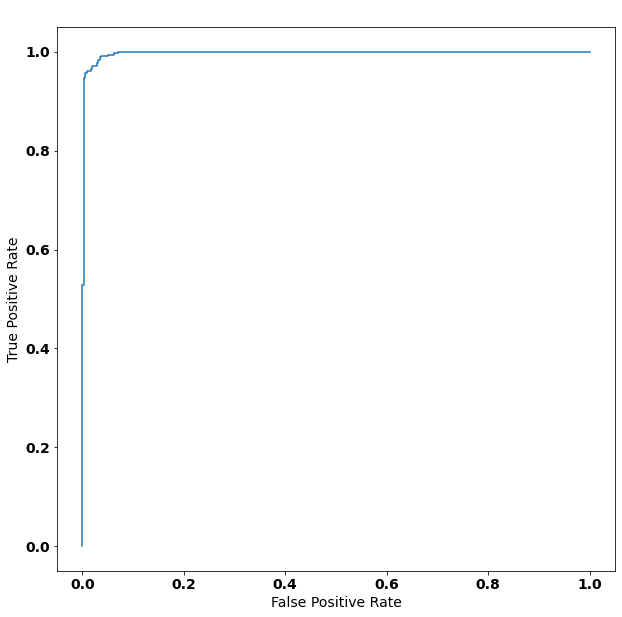

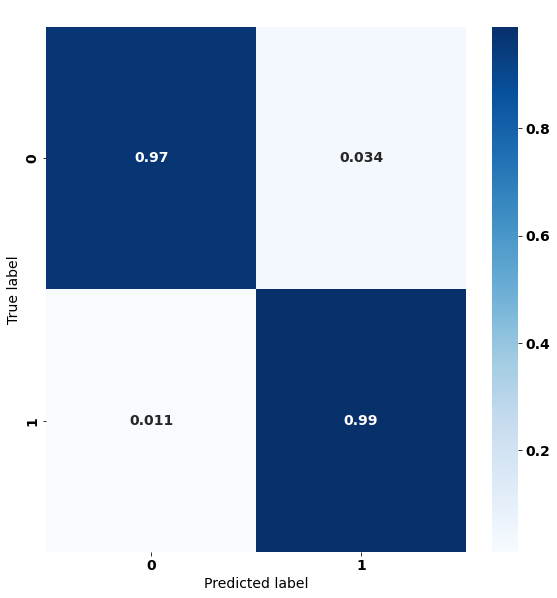

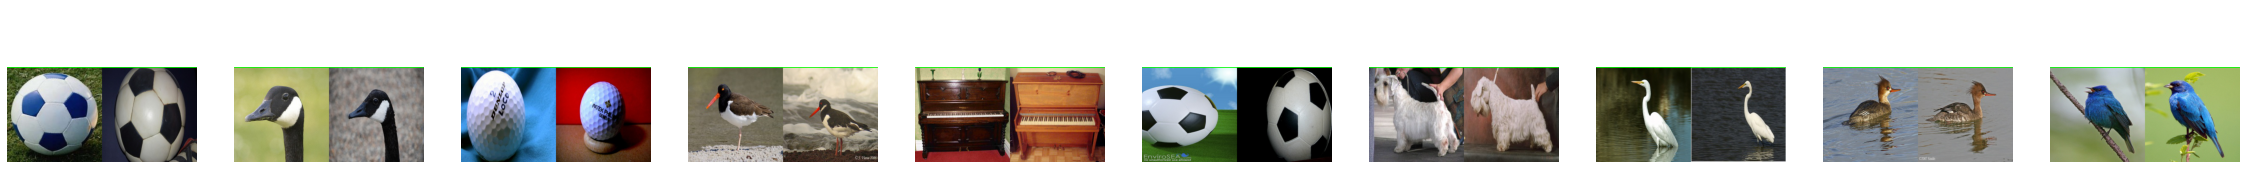

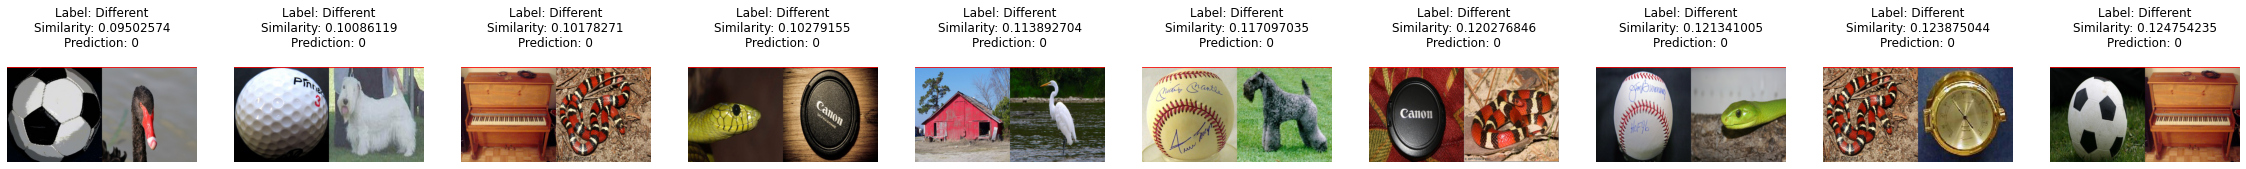

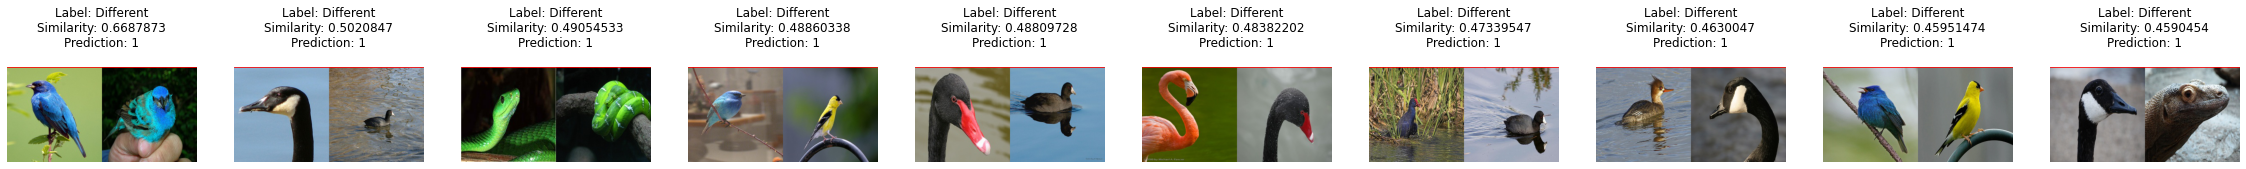

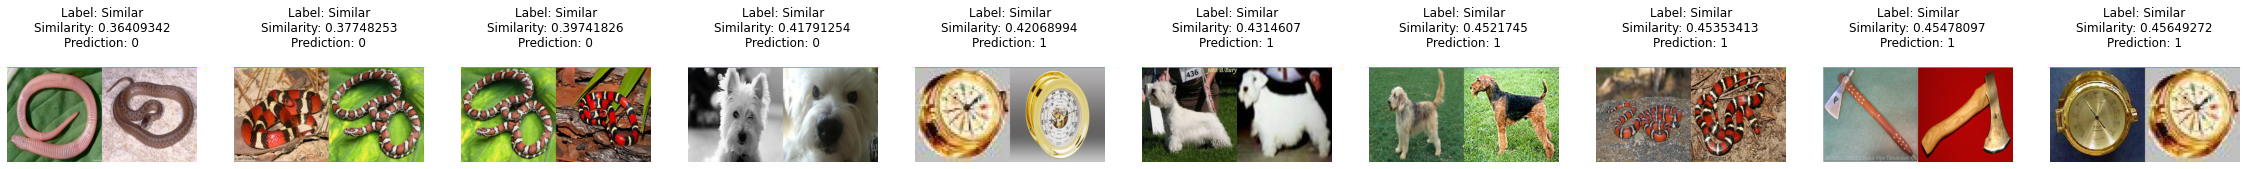

Threshold:  0.42000000000000026


In [6]:
util.evaluate(data=data, labels=labels, similarity=mobilenet_similarity, name="mobilenet")

Best accuracy: 0.577683615819209
resnet
- Amount of TP: 291
- Amount of TN: 118
- Amount of FP: 236
- Amount of FN: 63
- AUC score: 0.6454802259887006
- Accuracy: 0.577683615819209
- Recall: 0.8220338983050848
- Precision: 0.5521821631878557
- F1: 0.6606129398410896
- Kappa: 0.15536723163841804


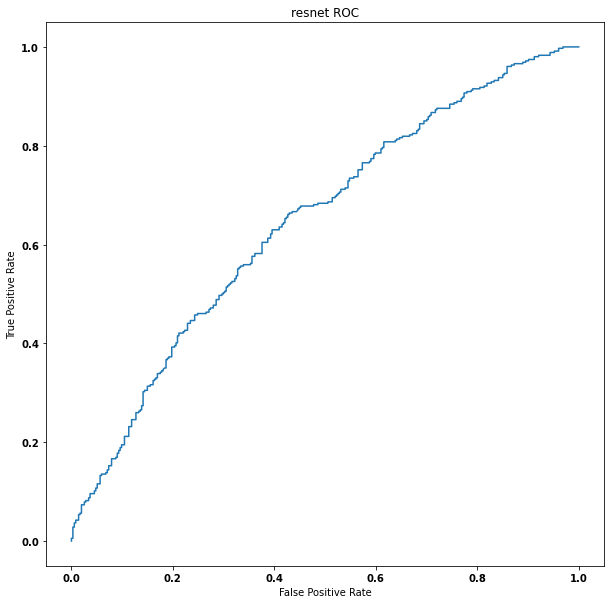

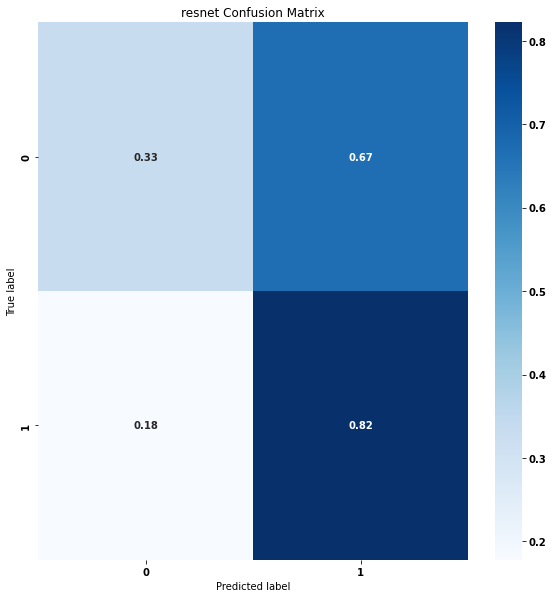

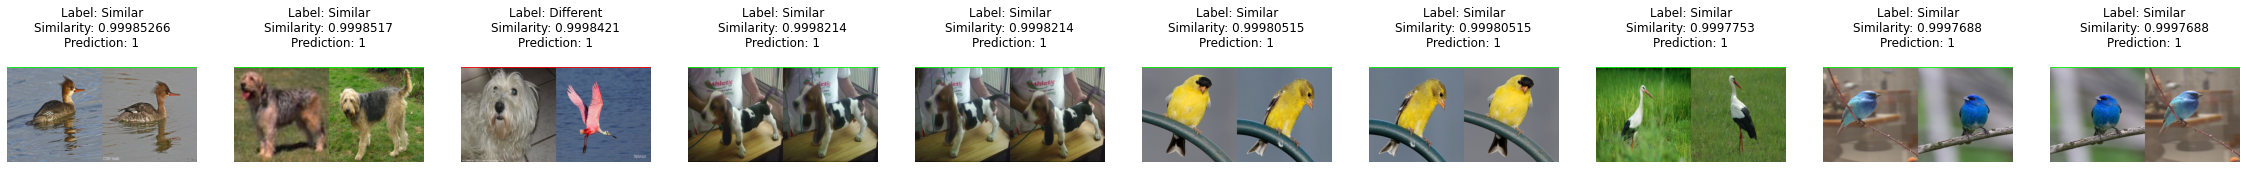

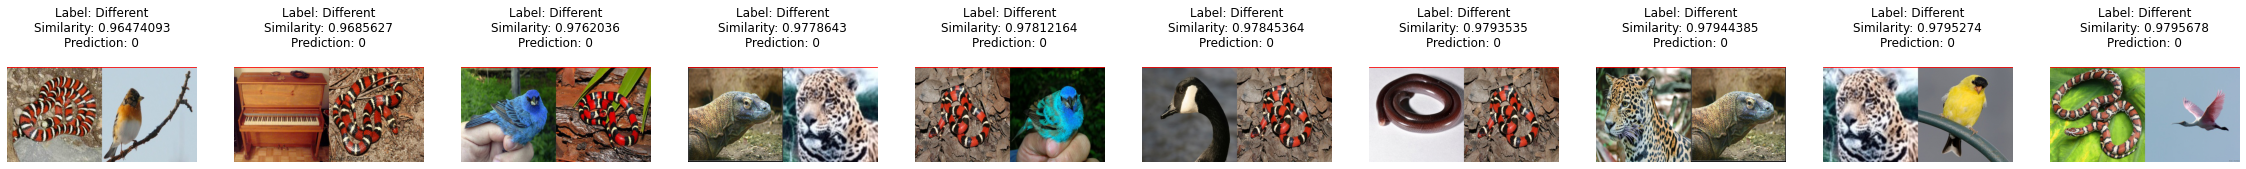

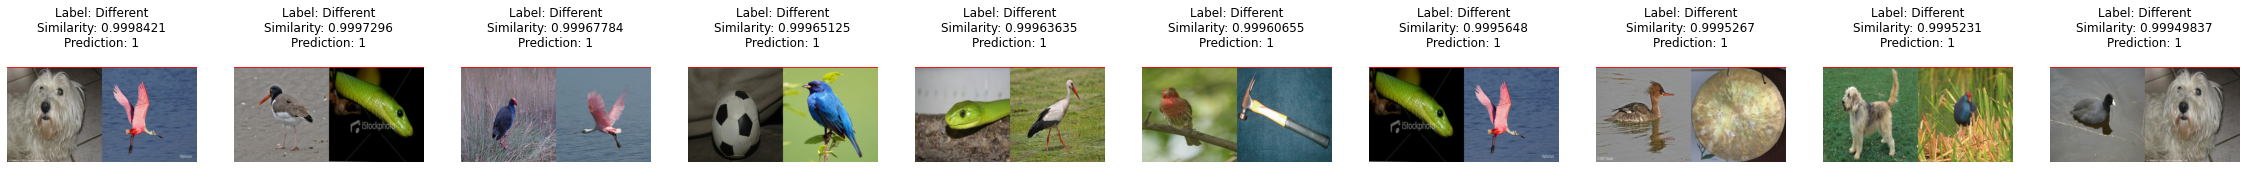

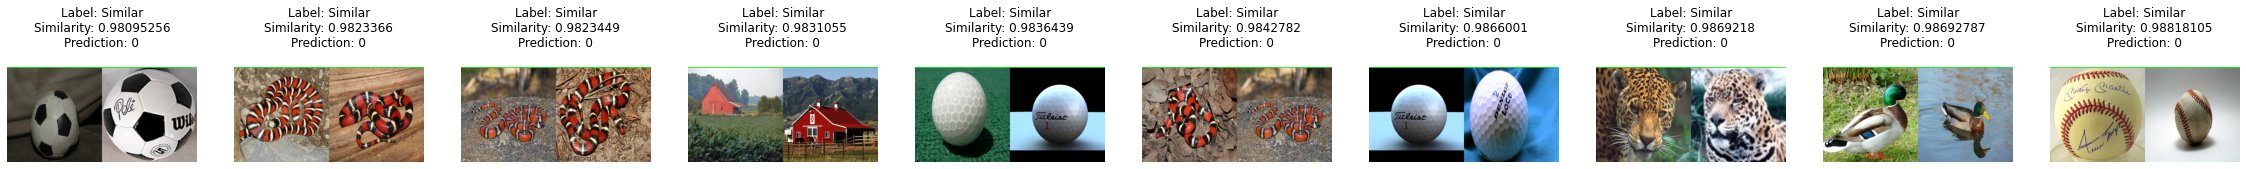

Threshold:  0.9950000000000008


In [7]:
util.evaluate(data=data, labels=labels, similarity=resnet_similarity, name="resnet")

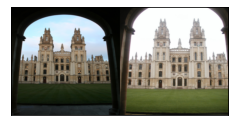

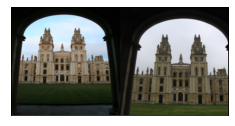

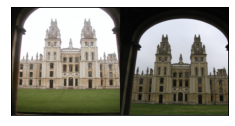

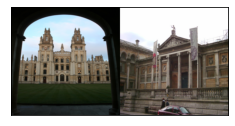

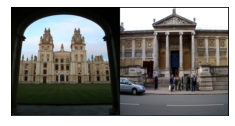

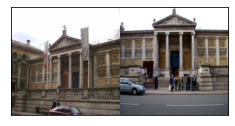

0.84863645
0.8538574
0.88150984
0.506771
0.5598744
0.74410963


In [8]:
test_img1 = util.load_image_norm('data/dataset/all_souls/all_souls_000002.jpg')
test_img2 = util.load_image_norm('data/dataset/all_souls/all_souls_000006.jpg')
test_img3 = util.load_image_norm('data/dataset/all_souls/all_souls_000140.jpg')
test_img4 = util.load_image_norm('data/dataset/ashmolean/ashmolean_000002.jpg')
test_img5 = util.load_image_norm('data/dataset/ashmolean/ashmolean_000000.jpg')

test_img1_features = mobilenet_embedding.predict(test_img1)
test_img2_features = mobilenet_embedding.predict(test_img2)
test_img3_features = mobilenet_embedding.predict(test_img3)
test_img4_features = mobilenet_embedding.predict(test_img4)
test_img5_features = mobilenet_embedding.predict(test_img5)

sim1 = util.cosine_similarity(test_img1_features, test_img2_features)
sim2 = util.cosine_similarity(test_img1_features, test_img3_features)
sim3 = util.cosine_similarity(test_img2_features, test_img3_features)
sim4 = util.cosine_similarity(test_img1_features, test_img4_features)
sim5 = util.cosine_similarity(test_img1_features, test_img5_features)
sim6 = util.cosine_similarity(test_img4_features, test_img5_features)

util.visualize_images(test_img1[0], test_img2[0])
util.visualize_images(test_img1[0], test_img3[0])
util.visualize_images(test_img2[0], test_img3[0])
util.visualize_images(test_img1[0], test_img4[0])
util.visualize_images(test_img1[0], test_img5[0])
util.visualize_images(test_img4[0], test_img5[0])

print(sim1)
print(sim2)
print(sim3)
print(sim4)
print(sim5)
print(sim6)

In [9]:
# mobilenet_embedding.save('models/embeddings/pretrained_mobilenet_embedding_extractor.h5')
# resnet_embedding.save('models/embeddings/pretrained_resnet_embedding_extractor.h5')

In [10]:
# !tensorflowjs_converter --input_format keras --weight_shard_size_bytes 1073741824 models/embeddings/pretrained_mobilenet_embedding_extractor.h5 models/embeddings/pretrained_mobilenet_embedding_extractor.tfjs
# !tensorflowjs_converter --input_format keras --weight_shard_size_bytes 1073741824 models/embeddings/pretrained_resnet_embedding_extractor.h5 models/embeddings/pretrained_resnet_embedding_extractor.tfjs